In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 13725, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13725 (delta 2), reused 6 (delta 2), pack-reused 13715
Receiving objects: 100% (13725/13725), 13.19 MiB | 31.85 MiB/s, done.
Resolving deltas: 100% (9455/9455), done.
/content/yolov5
     |████████████████████████████████| 1.6 MB 4.7 MB/s 
     |████████████████████████████████| 145 kB 4.7 MB/s 
     |████████████████████████████████| 178 kB 43.2 MB/s 
     |████████████████████████████████| 1.1 MB 69.4 MB/s 
     |████████████████████████████████| 67 kB 4.9 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 138 kB 76.0 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4kL1TkqXVVSfXUmti3jb")
project = rf.workspace("pig-detection").project("pig-detection-final")
dataset = project.version(9).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Pig-detection-final-9 in yolov5pytorch:: 100%|██████████| 4500/4500 [00:00<00:00, 6773.72it/s]


In [ ]:
!python train.py --img 416 --batch 32 --epochs 300 --bbox_interval 25 --data {dataset.location}/data.yaml --weights yolov5l.pt

wandb: Currently logged in as: christian2903. Use `wandb login --relogin` to force relogin
train: weights=yolov5l.pt, cfg=, data=/content/datasets/Pig-detection-final-9/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=25, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-189-g2f1eb21 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp6/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/valid/images

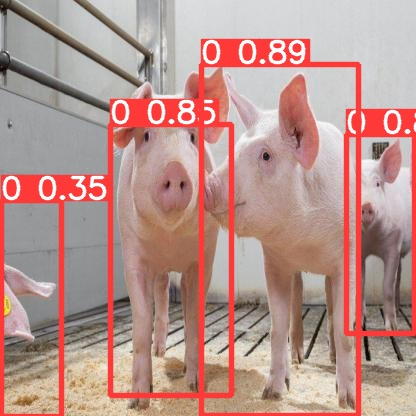

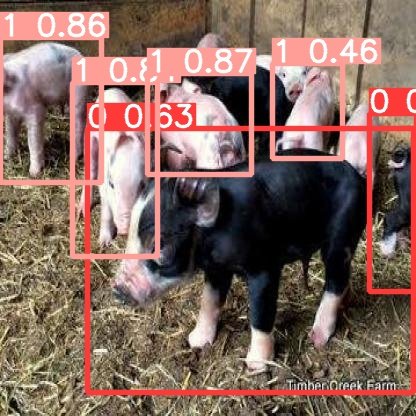

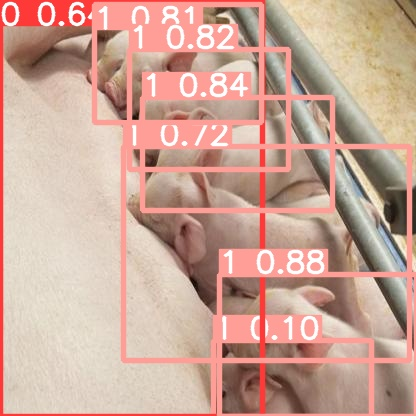

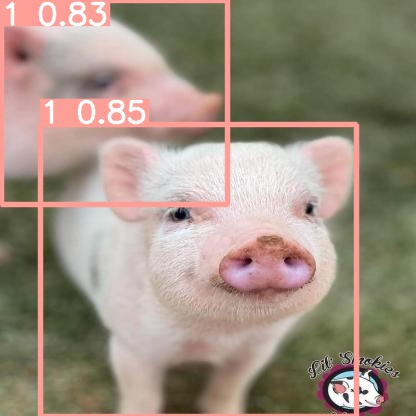

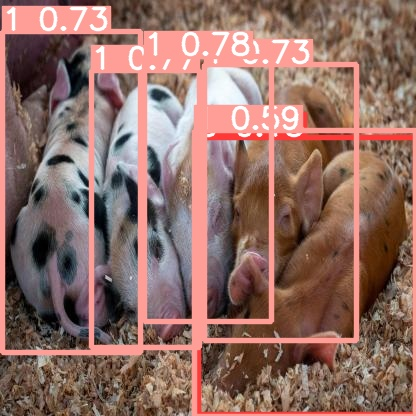

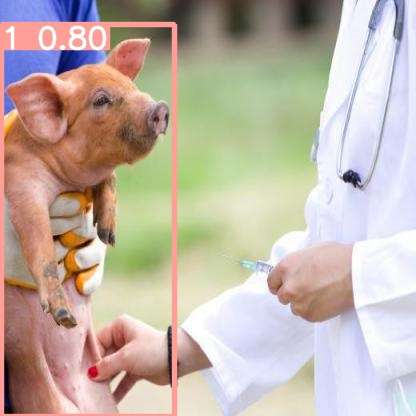

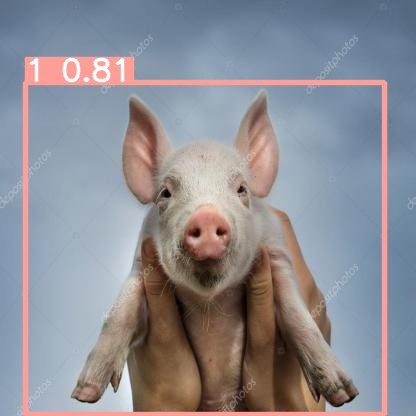

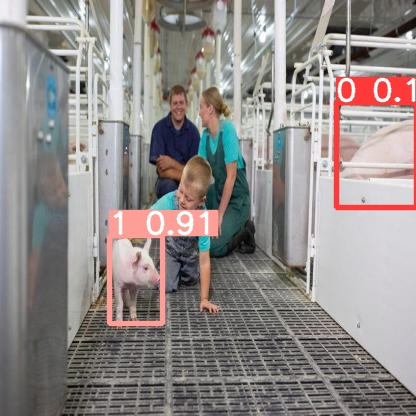

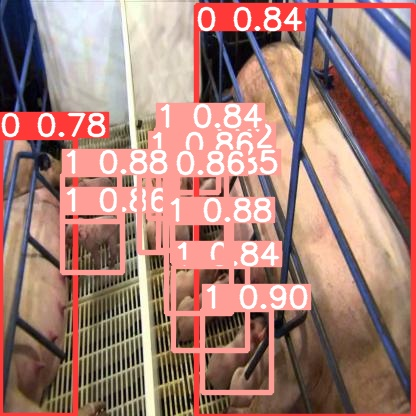

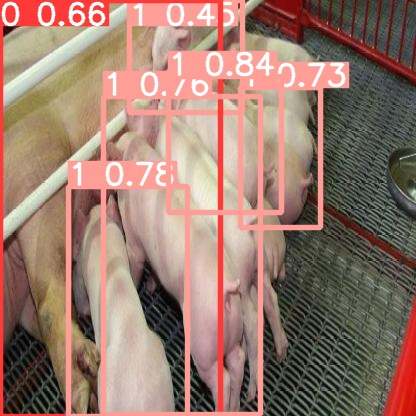

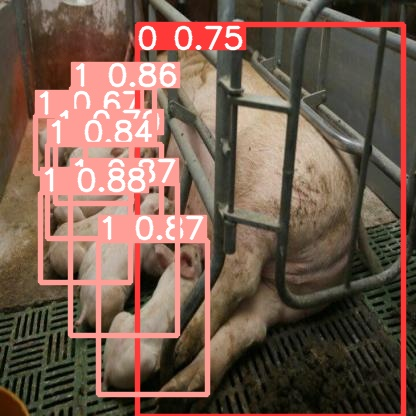

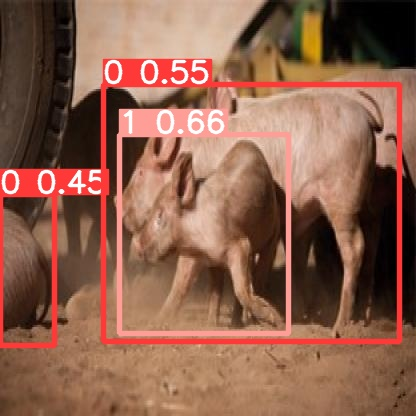

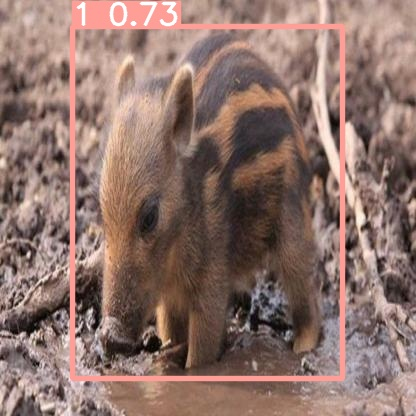

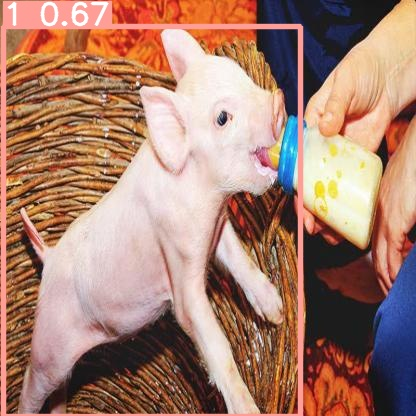

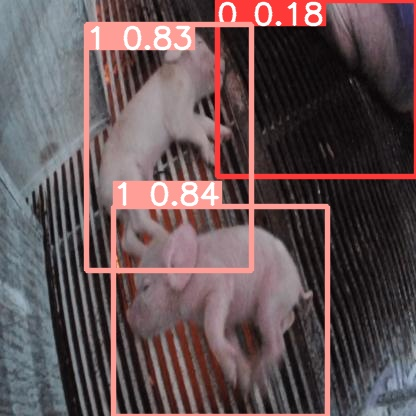

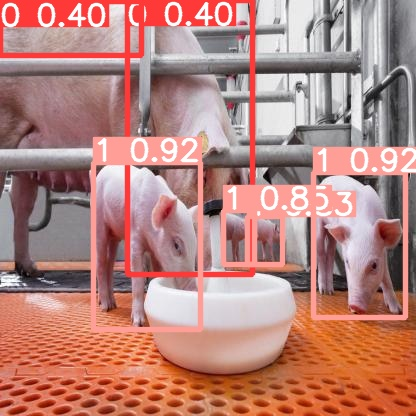

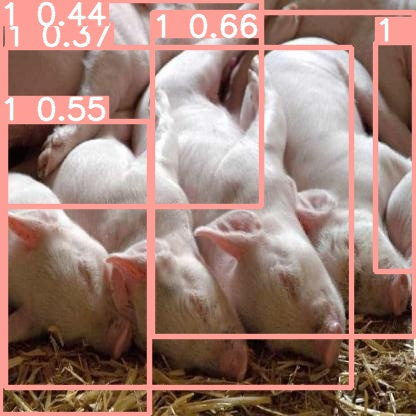

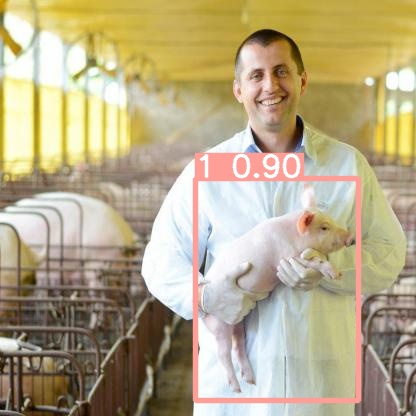

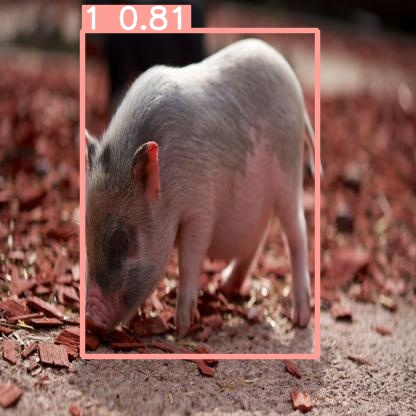

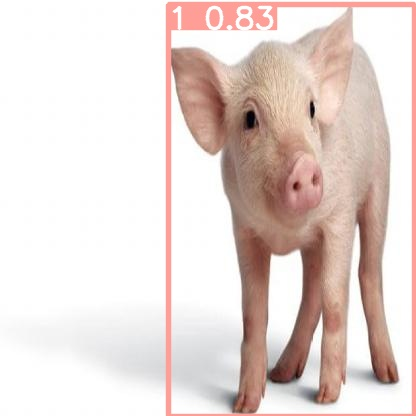

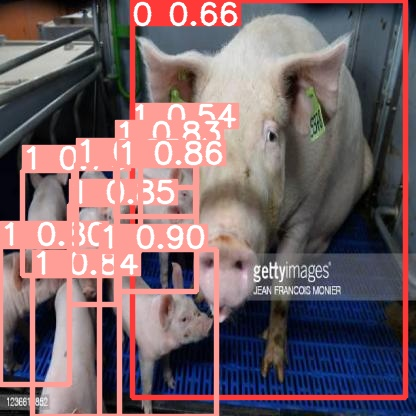

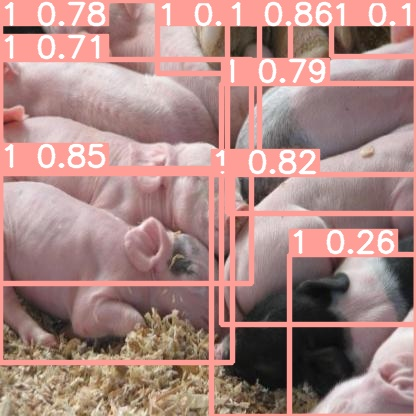

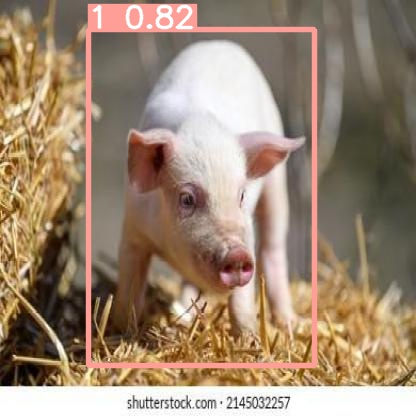

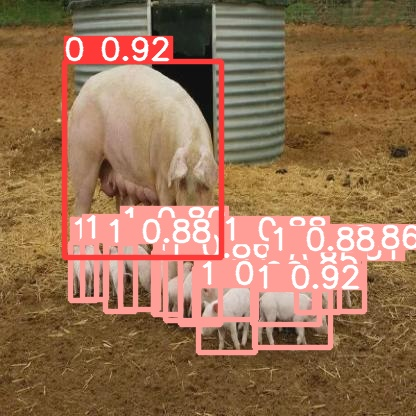

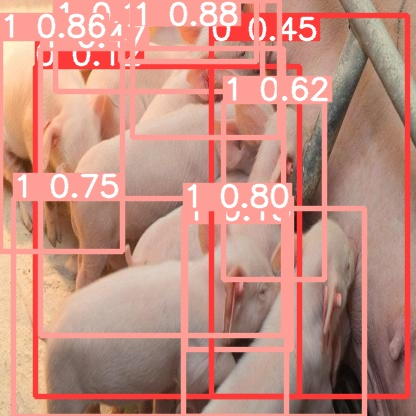

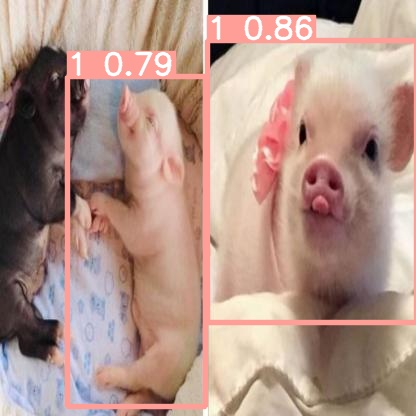

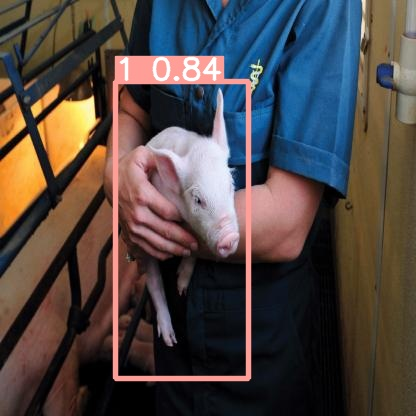

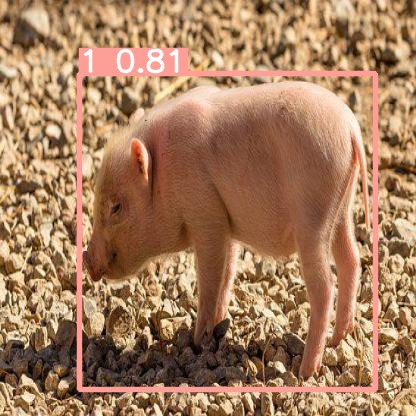

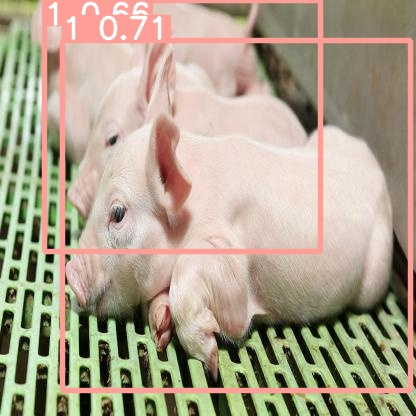

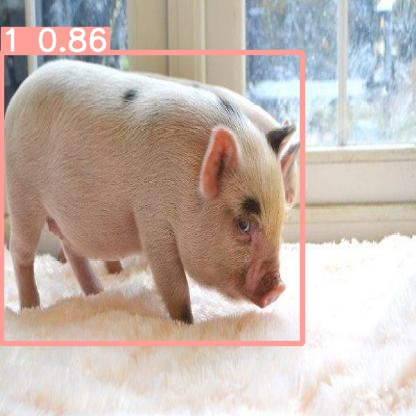

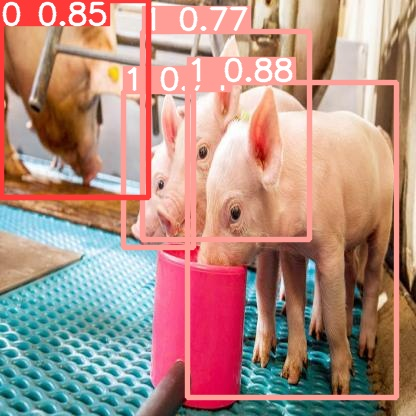

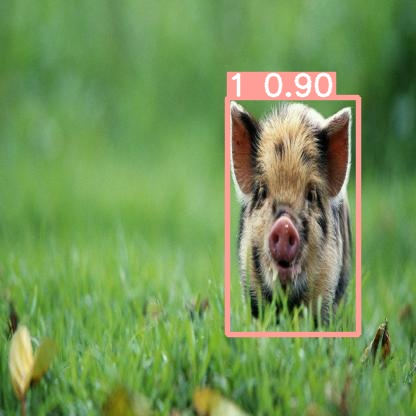

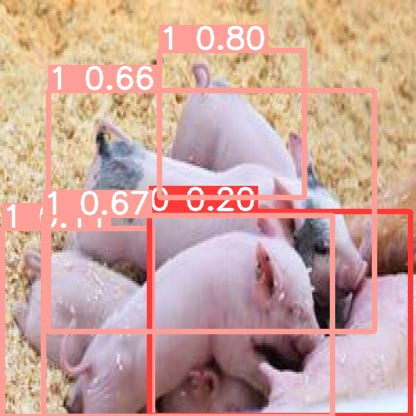

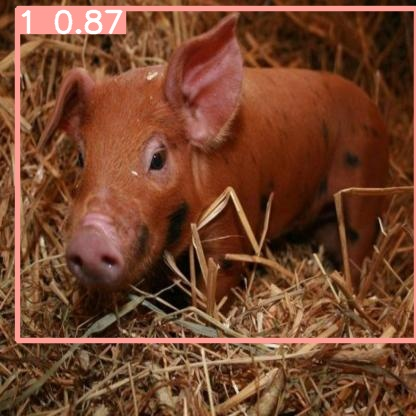

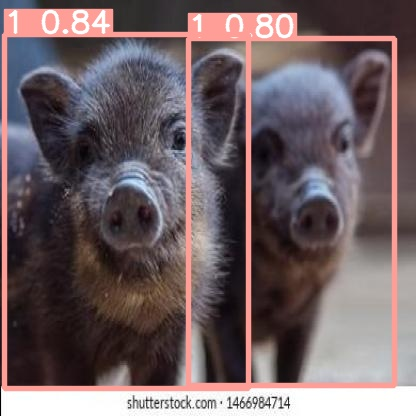

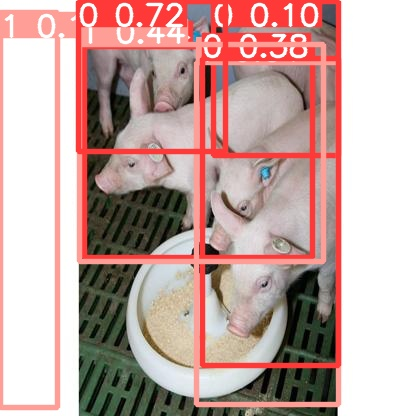

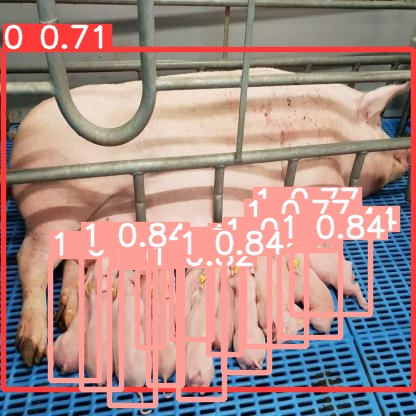

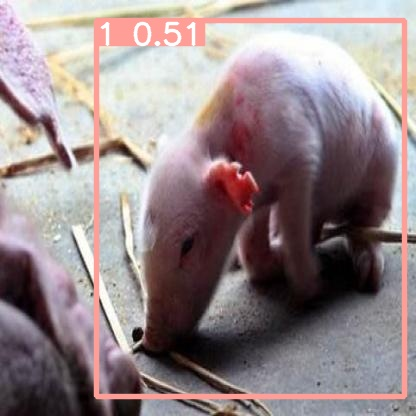

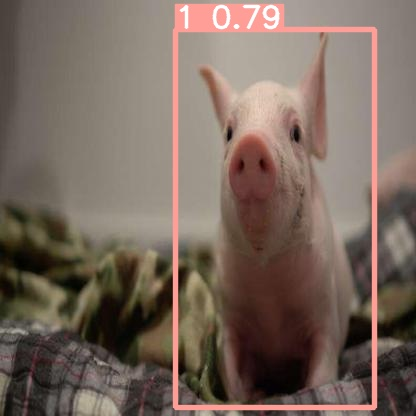

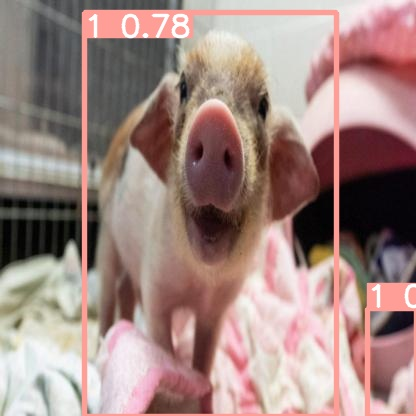

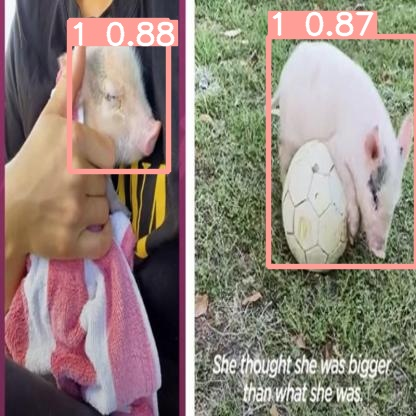

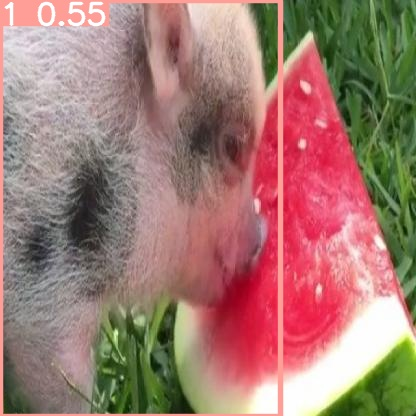

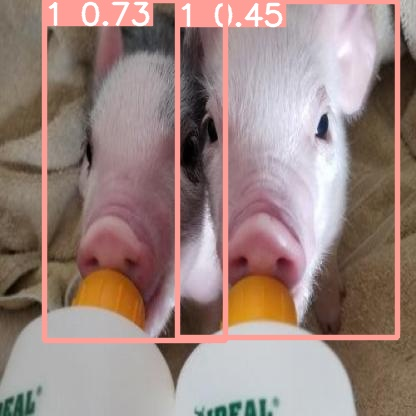

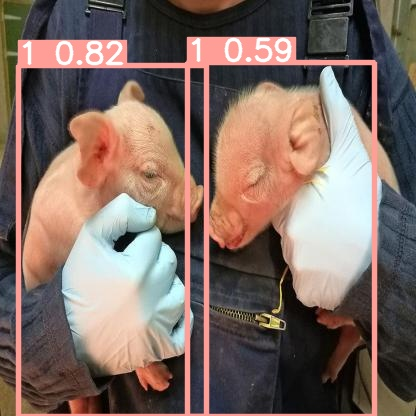

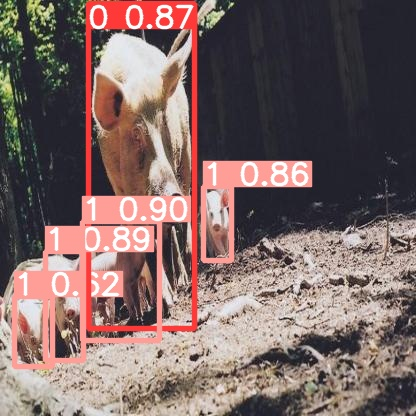

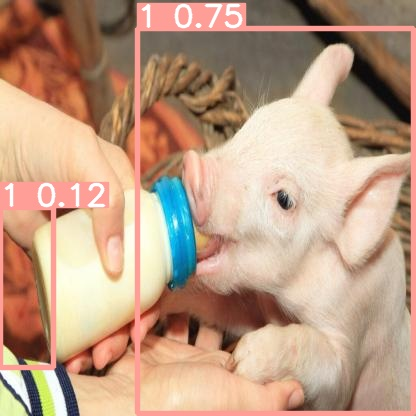

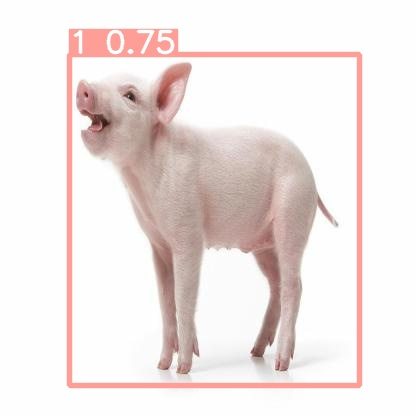

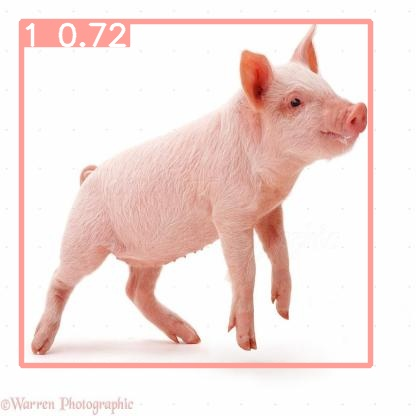

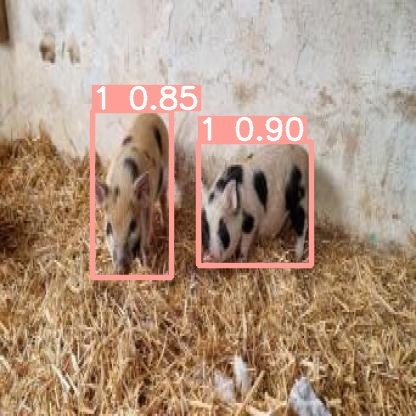

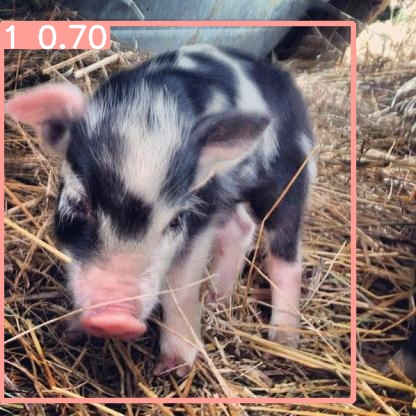

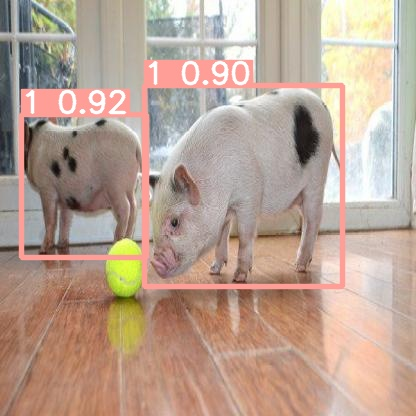

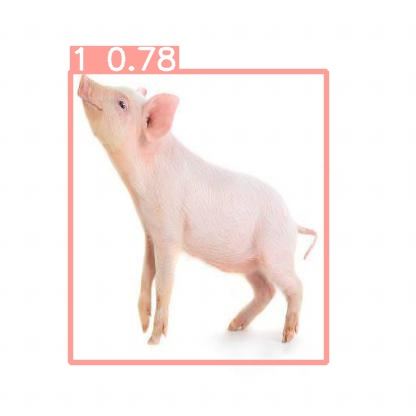

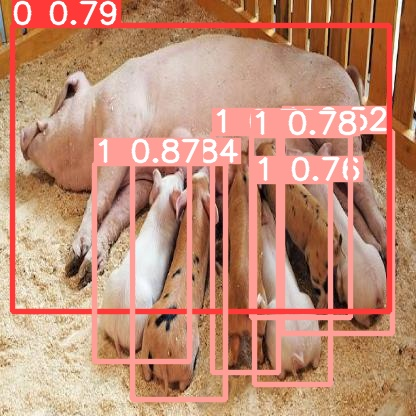

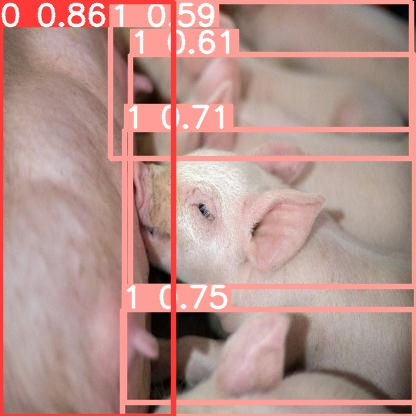

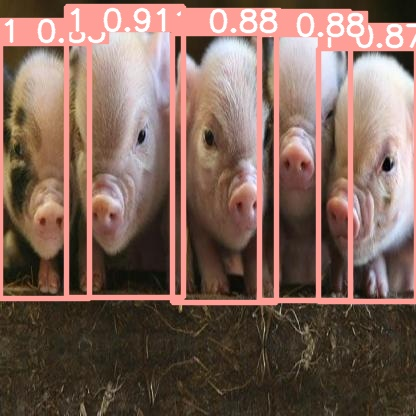

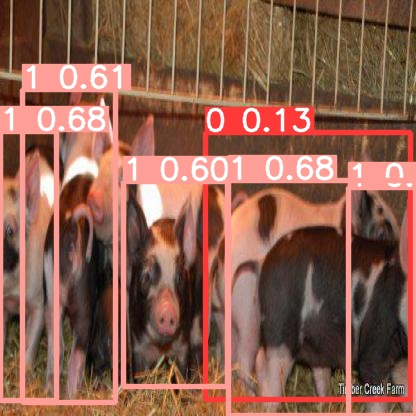

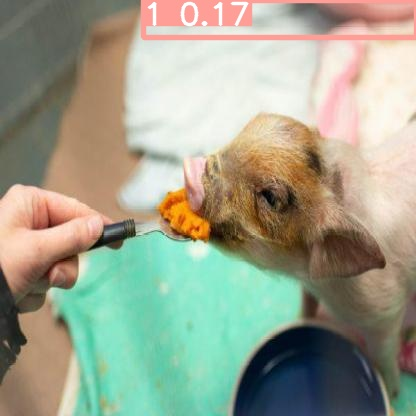

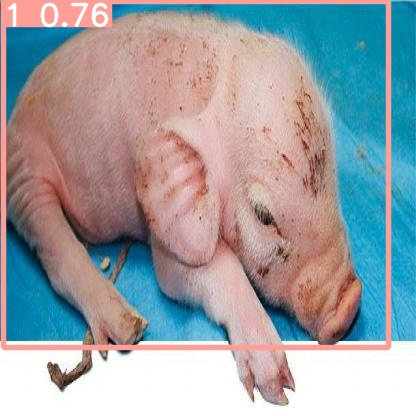

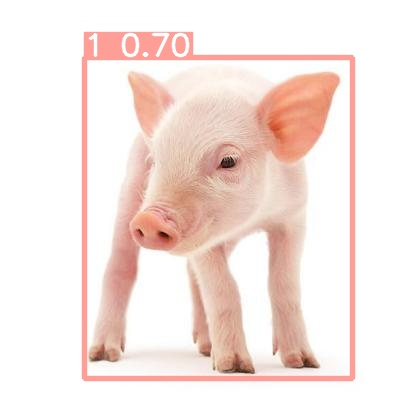

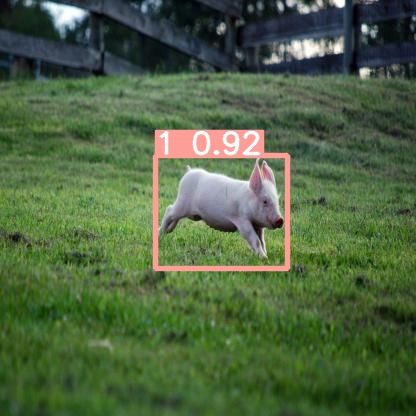

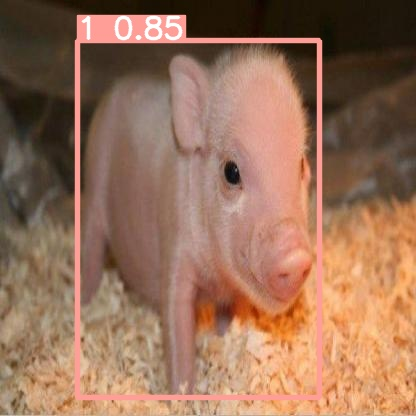

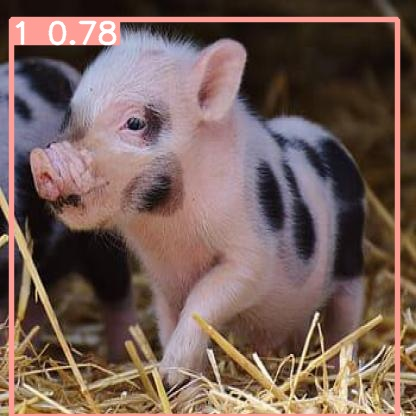

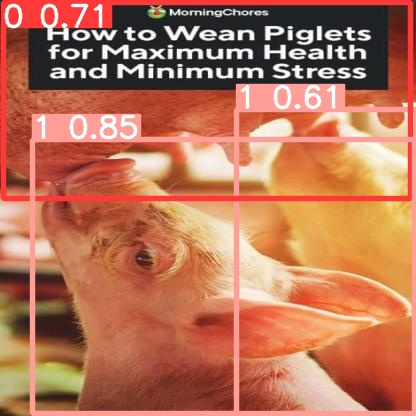

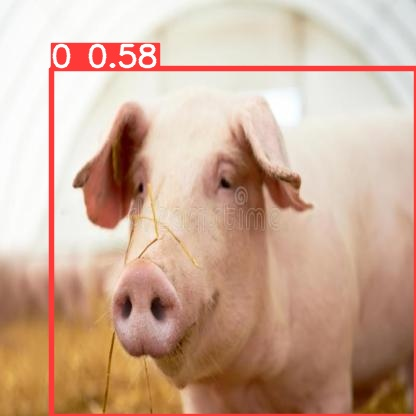

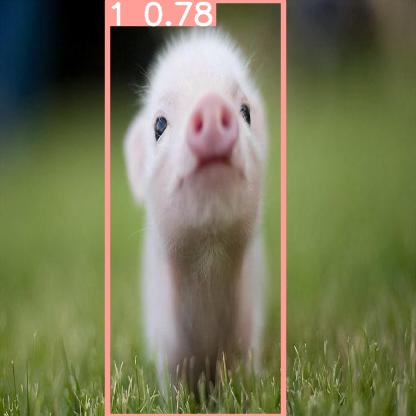

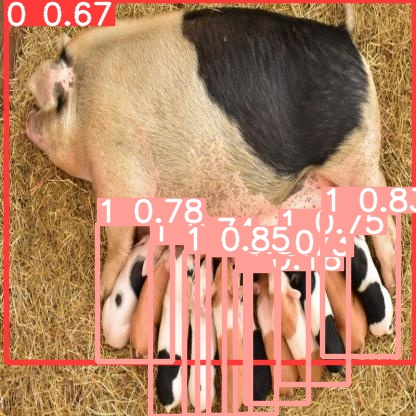

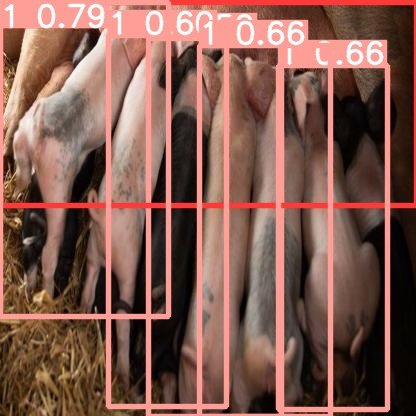

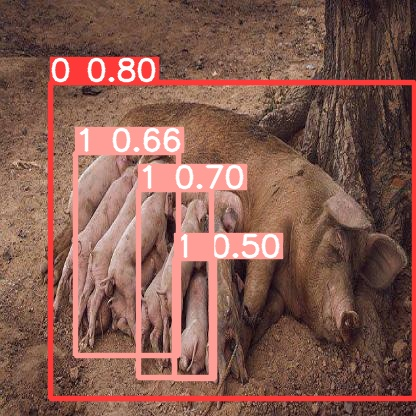

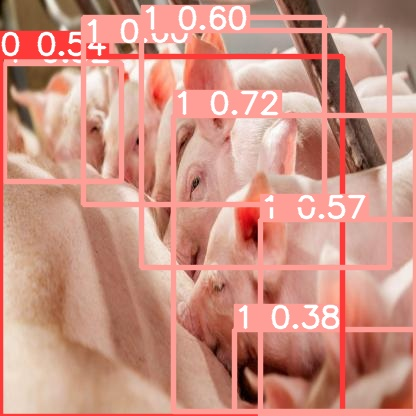

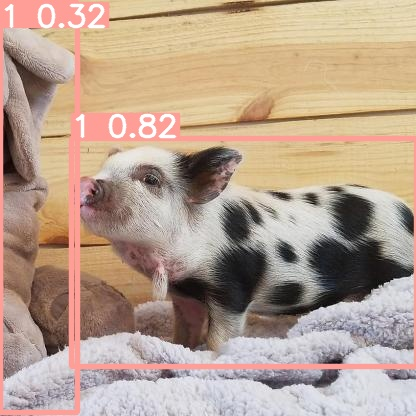

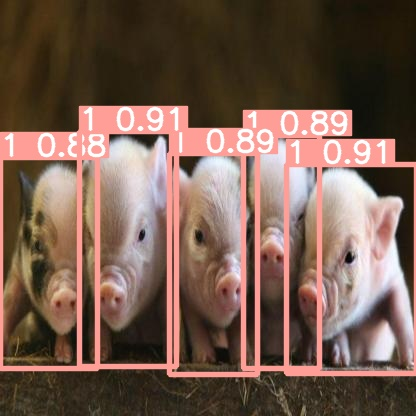

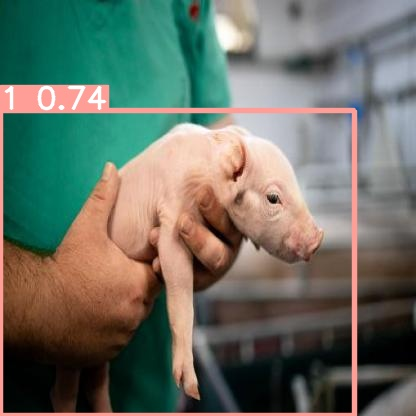

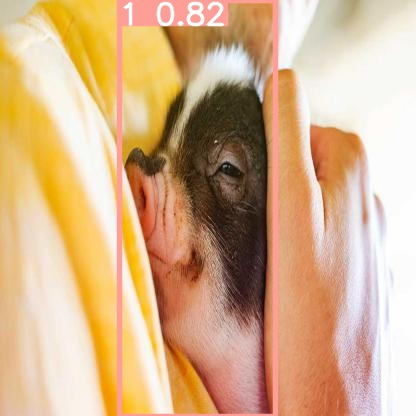

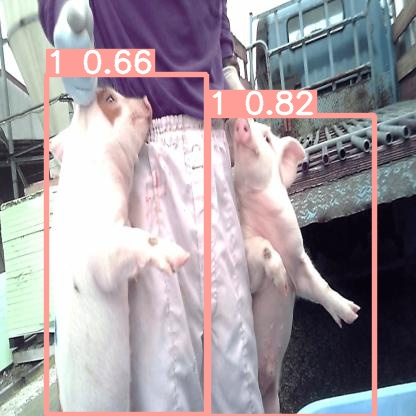

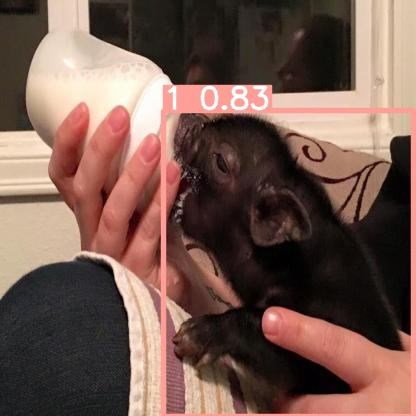

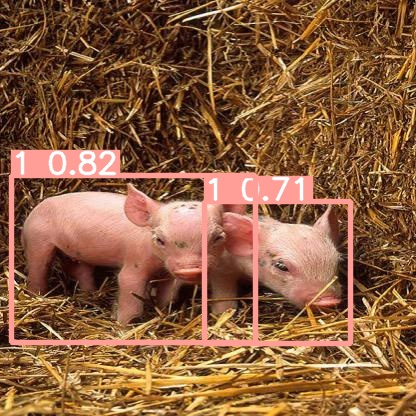

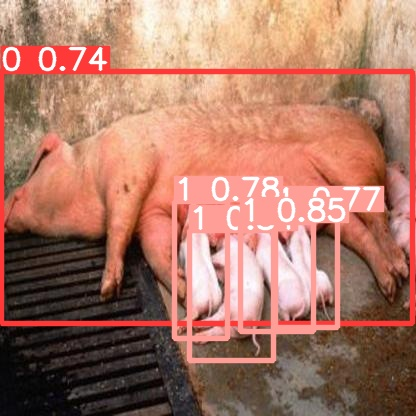

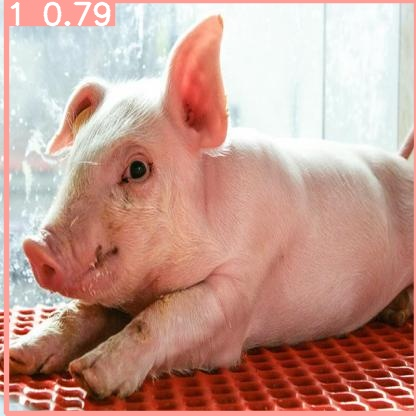

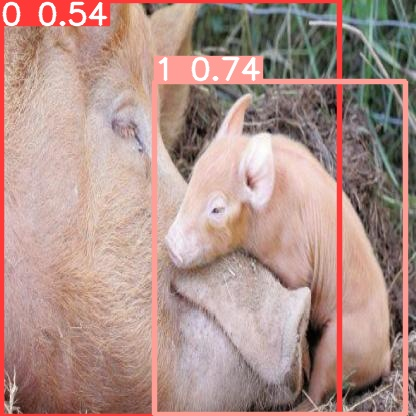

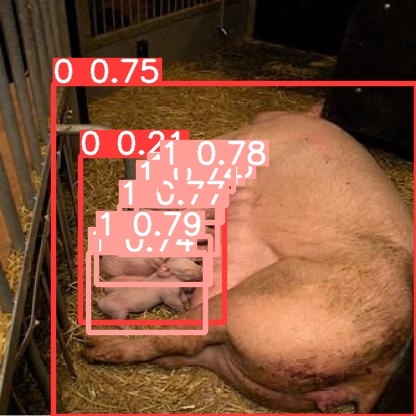

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp3/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
from google.colab import files
files.download('/content/yolov5/runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!python train.py --img 416 --batch 32 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5l.pt --evolve

wandb: Currently logged in as: christian2903. Use `wandb login --relogin` to force relogin
train: weights=yolov5l.pt, cfg=, data=/content/datasets/Pig-detection-final-9/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=300, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-189-g2f1eb21 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1